In [1]:
import torch

if torch.cuda.is_available():
    device = "cuda"
    print(f"✅ GPU is available: {torch.cuda.get_device_name(0)}")
    print("Proceed to the next step.")
else:
    device = "cpu"
    print("❌ Warning: No GPU detected. Image generation will be extremely slow.")
    print("If on Colab, go to Runtime > Change runtime type > select GPU.")

✅ GPU is available: Tesla T4
Proceed to the next step.


In [2]:
!pip install -q diffusers transformers accelerate torch
print("Libraries installed successfully.")

Libraries installed successfully.


In [3]:
from diffusers import StableDiffusionPipeline
import torch

# Define the model ID (Stable Diffusion v1.5)
model_id = "runwayml/stable-diffusion-v1-5"

print(f"Downloading and loading {model_id}...")

# Load the pipeline
# We use float16 to save massive amounts of VRAM
pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

# Move the pipeline to the GPU
pipe = pipe.to(device)

# Enable attention slicing to further reduce memory usage if needed (optional but good for lower VRAM)
pipe.enable_attention_slicing()

print("✅ Model loaded and ready on GPU!")

Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading weights:   0%|          | 0/396 [00:00<?, ?it/s]

StableDiffusionSafetyChecker LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/safety_checker
Key                                               | Status     |  | 
--------------------------------------------------+------------+--+-
vision_model.vision_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Loading weights:   0%|          | 0/196 [00:00<?, ?it/s]

CLIPTextModel LOAD REPORT from: /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-v1-5/snapshots/451f4fe16113bff5a5d2269ed5ad43b0592e9a14/text_encoder
Key                                | Status     |  | 
-----------------------------------+------------+--+-
text_model.embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


✅ Model loaded and ready on GPU!


In [4]:
# Cell 4: Define Generation Function
import matplotlib.pyplot as plt

def generate_art(prompt, negative_prompt="", steps=30, guidance=7.5, seed=None):
    """
    Helper function to generate and display images.
    - guidance (cfg scale): How strictly the model follows the prompt.
      Lower (e.g., 4) is more creative but maybe unrelated. Higher (e.g., 12) is strict but can fry the image. 7-8 is standard.
    - steps: More steps usually mean higher quality, up to a point (30-50 is good).
    """

    # Set seed for reproducibility (optional)
    if seed is not None:
        generator = torch.Generator(device).manual_seed(seed)
    else:
        generator = None

    print(f"Generating: '{prompt[:50]}...'")

    # Run the pipeline
    image = pipe(
        prompt,
        negative_prompt=negative_prompt,
        num_inference_steps=steps,
        guidance_scale=guidance,
        generator=generator
    ).images[0]

    # Display using matplotlib
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.axis("off") # Hide axes
    plt.show()

    return image

print("Helper function defined.")

Helper function defined.


Generating: 'A surreal landscape painting of a floating island ...'


  0%|          | 0/40 [00:00<?, ?it/s]

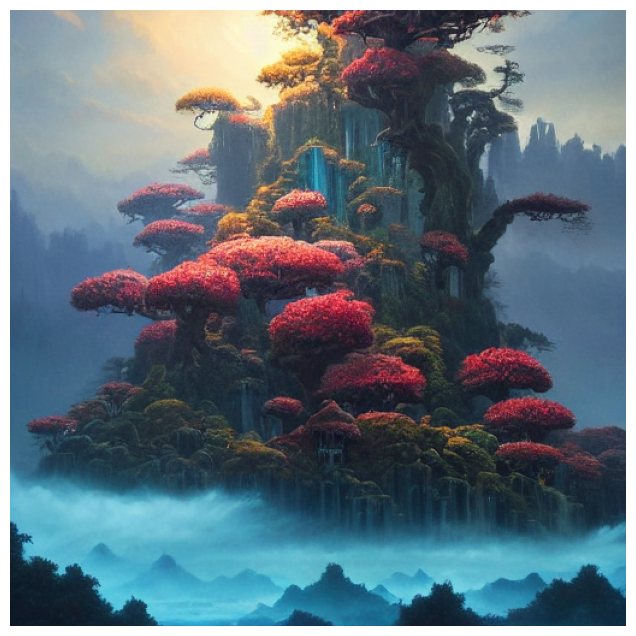

In [5]:
# Cell 5: Generate Image 1 (Fantasy Style)

creative_prompt = (
    "A surreal landscape painting of a floating island made of clockwork gears and ancient trees, "
    "waterfalls cascading from the edge into clouds below, bioluminescent flora, intricate details, "
    "magical atmosphere, oil on canvas style by Greg Rutkowski and Studio Ghibli, colorful, trending on artstation"
)

negative_prompt = "ugly, tiling, poorly drawn, out of frame, disfigured, blurry, bad anatomy, watermark, signature, cut off, low contrast"

# Generate
art_image_1 = generate_art(
    prompt=creative_prompt,
    negative_prompt=negative_prompt,
    steps=40,
    guidance=8.0,
    seed=1024 # Using a seed ensures you get the same image as me
)

Generating: 'A surreal landscape painting of a floating island ...'


  0%|          | 0/40 [00:00<?, ?it/s]

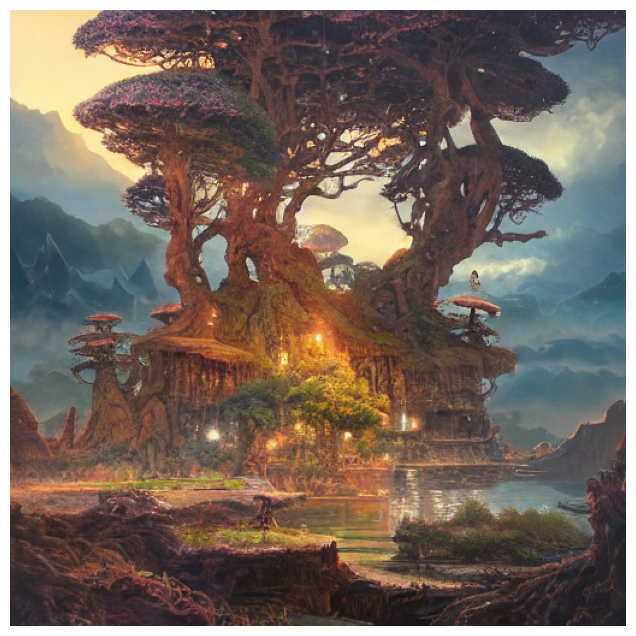

In [6]:
art_image_2 = generate_art(
    prompt=creative_prompt,
    negative_prompt=negative_prompt,
    steps=40,
    guidance=4.0,
    seed=512 # Using a seed ensures you get the same image as me
)